## **Gradient Boosting**

Gradient Boosting is another powerful boosting algorithm that, like AdaBoost, builds an ensemble of predictors sequentially. However, instead of adjusting instance weights, Gradient Boosting focuses on correcting the residuals (errors) made by the previous predictor at each iteration.

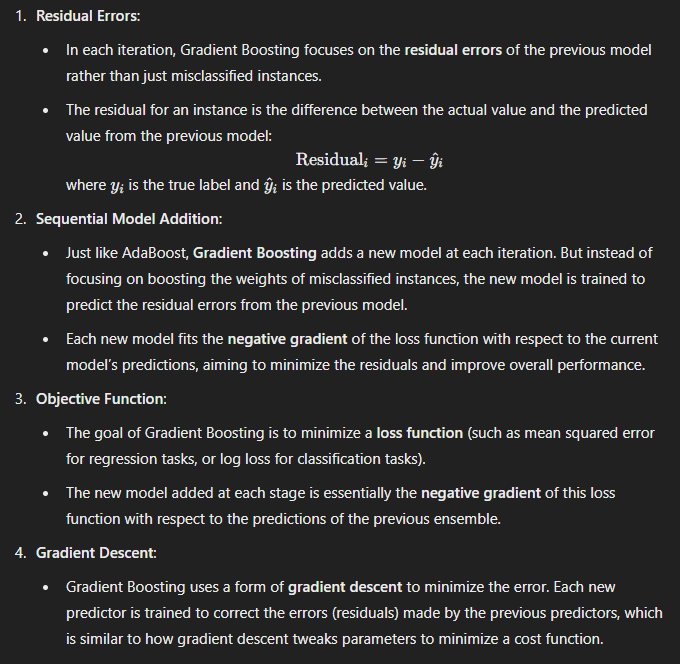

#### **Steps in Gradient Boosting**

1. **Initialize:** Start with a simple model (often the mean value for regression or log-odds for classification) as the first predictor.
2. **Compute Residuals:** For each subsequent model, calculate the residual errors (or negative gradient) of the current ensemble's predictions.
3. **Fit New Model:** Train a new model to predict the residuals (errors) from the previous step.
4. **Update Predictions:** The ensemble is updated by adding the predictions from the new model, which aims to correct the errors made by previous models.
5. **Repeat:** This process is repeated for a set number of iterations or until the residuals stop improving significantly.

#### **Mathematical Formulation of Gradient Boosting**

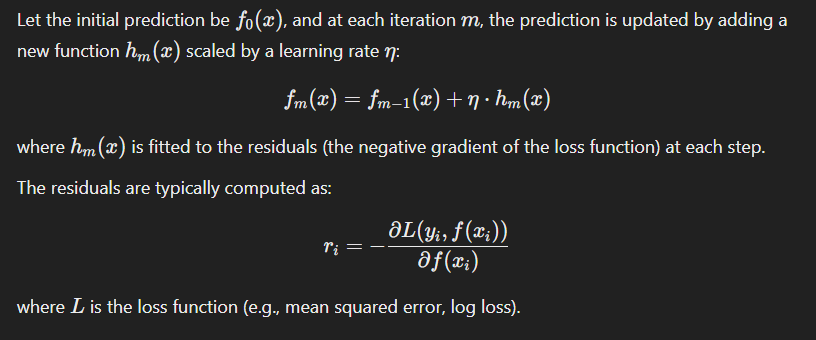

#### **Advantages of Gradient Boosting**

- **Highly Accurate:** Gradient Boosting often produces highly accurate models, especially when properly tuned.
- **Flexibility:** It works well for both regression and classification problems, and can handle different types of loss functions.
- **Feature Importance:** It can be used to estimate feature importance, as the models built at each step focus on different features.

#### **Comparison with AdaBoost**

- **Weight Adjustment:** AdaBoost adjusts the weights of misclassified instances, whereas Gradient Boosting focuses on fitting residuals (errors).
- **Model Training:** In AdaBoost, weak learners are added based on how well they correct errors from previous models, while in Gradient Boosting, each new model tries to correct the residual errors directly.
- **Performance:** Gradient Boosting generally tends to perform better for complex datasets because it minimizes the residual errors directly, while AdaBoost may be more sensitive to noisy data.

#### **Gradient Boosting Variants**

- **XGBoost:** A highly optimized and scalable version of Gradient Boosting, popular for its speed and performance, especially in large datasets.
- **LightGBM:** A variant of Gradient Boosting that uses a histogram-based approach for faster training and better performance on large datasets.
- **CatBoost:** Another variant that is particularly effective with categorical features and reduces the need for extensive feature engineering.

#### **Working of Gradient Boosting**

Let’s go through a simple regression example using Decision Trees as the base predictors (of course Gradient Boosting also works great with regression tasks). This is called Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT). First, let’s fit a DecisionTreeRegressor to the training set (for example, a noisy quadratic training set):

In [28]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [8]:
X, y=make_regression(n_samples=1000, n_features=2, n_targets=1, noise=0.2, random_state=42)

In [9]:
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [15]:
mean_squared_error(y, tree_reg1.predict(X))

220.85713719110475

Now train a second DecisionTreeRegressor on the residual errors made by the first predictor:

In [10]:
y2=y-tree_reg1.predict(X)
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [17]:
mean_squared_error(y2, tree_reg2.predict(X))

157.3503945951722

Then we train a third regressor on the residual errors made by the second predictor:

In [11]:
y3=y2-tree_reg2.predict(X)
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [20]:
mean_squared_error(y3, tree_reg3.predict(X))

125.09608795401908

Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up the predictions of all the trees:

In [13]:
y_pred=sum(tree.predict(X) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [22]:
mean_squared_error(y, y_pred)

125.09608795401908

A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRe gressor class. Much like the RandomForestRegressor class, it has hyperparameters to control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, and so on), as well as hyperparameters to control the ensemble training, such as the number of trees (n_estimators). The following code creates the same ensemble as the previous one:

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
gbrt=GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

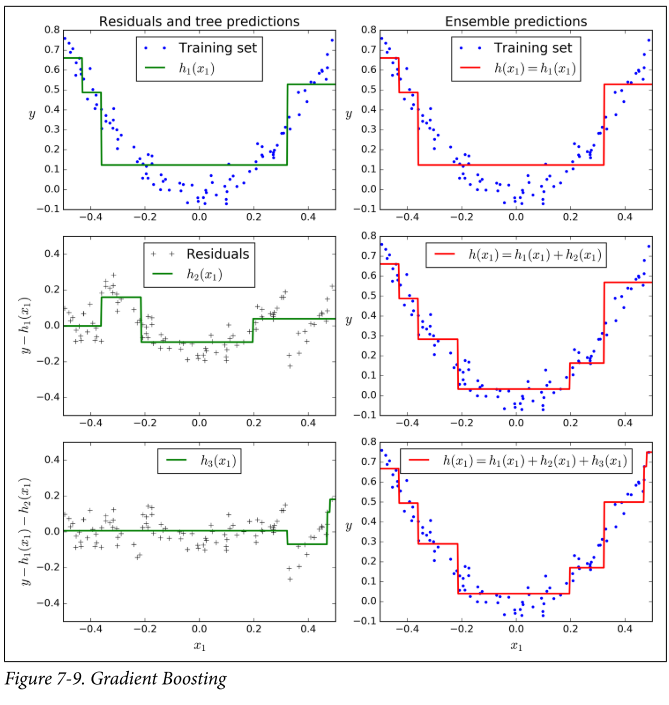

Figure 7-9 represents the predictions of these three trees in the left column, and the ensemble’s predictions in the right column. In the first row, the ensemble has just one tree, so its predictions are exactly the same as the first tree’s predictions. In the second row, a new tree is trained on the residual errors of the first tree. On the right you can see that the ensemble’s predictions are equal to the sum of the predictions of the first two trees. Similarly, in the third row another tree is trained on the residual errors of the second tree. You can see that the ensemble’s predictions gradually get better as trees are added to the ensemble.

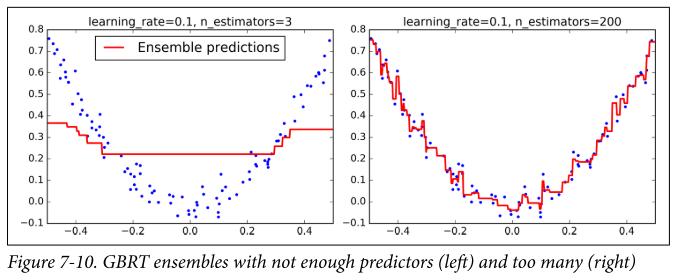

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120) 
gbrt.fit(X_train, y_train)
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators) 
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=119)

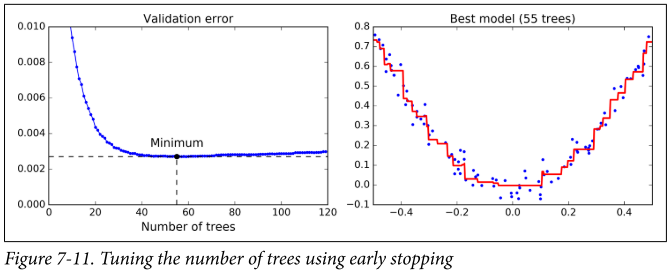

It is also possible to implement early stopping by actually stopping training early (instead of training a large number of trees first and then looking back to find the optimal number). You can do so by setting warm_start=True, which makes ScikitLearn keep existing trees when the fit() method is called, allowing incremental training. The following code stops training when the validation error does not improve for five iterations in a row:

In [31]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf") 
error_going_up = 0 
for n_estimators in range(1, 120): 
    gbrt.n_estimators = n_estimators 
    gbrt.fit(X_train, y_train) 
    y_pred = gbrt.predict(X_val) 
    val_error = mean_squared_error(y_val, y_pred) 
    if val_error < min_val_error: 
        min_val_error = val_error 
        error_going_up = 0
    else:
        error_going_up += 1 
        if error_going_up == 5: 
            break # early stopping

The GradientBoostingRegressor class also supports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree. For example, if subsample=0.25, then each tree is trained on 25% of the training instances, selected randomly. As you can probably guess by now, this trades a higher bias for a lower variance. It also speeds up training considerably. This technique is called Stochastic Gradient Boosting.